In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

1) Hysterese
=========

In [2]:
#Hysteresis
I_down=np.array([13.0,11.0,9.0,7.0,5.0,3.0,1.0])
I_up=np.array([1.0,3.0,5.0,7.0,9.0,11.0,13.0])
I_all=np.array([13.0,11.0,9.0,7.0,5.0,3.0,1.0,1.0,3.0,5.0,7.0,9.0,11.0,13.0])
dI=0.3
B_down = np.array([0.343,0.247, 0.203, 0.140, 0.097, 0.057, 0.023]) #mT
dB_down=np.array([0.025, 0.017, 0.012, 0.008, 0.017, 0.005, 0.005])
B_all=np.array([0.343,0.247, 0.203, 0.140, 0.097, 0.057, 0.023,0.020, 0.070, 0.103, 0.123, 0.150, 0.23, 0.28])
dB_all=np.array([0.025, 0.017, 0.012, 0.008, 0.017, 0.005, 0.005,0.008,0.008,0.005,0.005,0.008,0.008,0.008])
B_up = np.array([0.020, 0.070, 0.103, 0.123, 0.150, 0.23, 0.28])
dB_up = np.array([0.008,0.008,0.005,0.005,0.008,0.008,0.008])

A 0.0225077360384 +- 0.00143726112199
B -0.00583028220757 +- 0.0068232446689


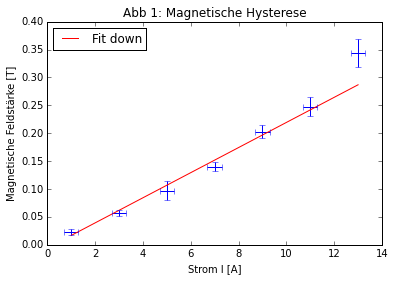

In [4]:
def Bfit(x,A,B):
    return A*x+B

popt, pcov=curve_fit(Bfit,I_down, B_down, sigma=dB_down)

plt.plot(I_down, Bfit(I_down,*popt), "-r", label="Fit down")
plt.errorbar(I_down, B_down, xerr=dI, yerr=dB_down, fmt="none")

plt.title("Abb 1: Magnetische Hysterese")
plt.xlabel("Strom I [A]")
plt.ylabel("Magnetische Feldstärke [T]")
plt.legend(loc="best")
plt.savefig("Hysterese.pdf")
print("A", popt[0], "+-", pcov[0,0]**0.5)
print("B", popt[1], "+-", pcov[1,1]**0.5)

A 0.0203127055833 +- 0.00193052440177
B -0.00464589152856 +- 0.014494059171


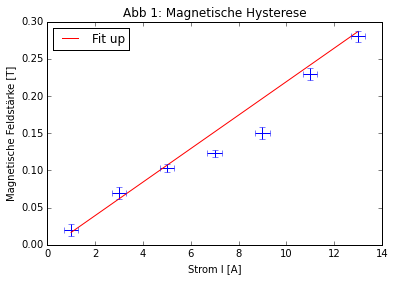

In [5]:
popt1, pcov1=curve_fit(Bfit,I_up, B_up, sigma=dB_up)
plt.plot(I_up, Bfit(I_up,*popt), "-r", label="Fit up")
plt.errorbar(I_up, B_up, xerr=dI, yerr=dB_up, fmt="none")

plt.title("Abb 1: Magnetische Hysterese")
plt.xlabel("Strom I [A]")
plt.ylabel("Magnetische Feldstärke [T]")
plt.legend(loc="best")
plt.savefig("Hysterese1.pdf")
print("A", popt1[0], "+-", pcov1[0,0]**0.5)
print("B", popt1[1], "+-", pcov1[1,1]**0.5)

A 0.0205607247095 +- 0.00112631006555
B -0.00315843302625 +- 0.00733468400318


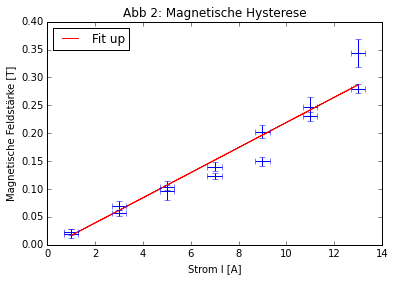

In [6]:
popt2, pcov2=curve_fit(Bfit,I_all, B_all, sigma=dB_all)
plt.plot(I_all, Bfit(I_all,*popt), "-r", label="Fit up")
plt.errorbar(I_all, B_all, xerr=dI, yerr=dB_all, fmt="none")

plt.title("Abb 2: Magnetische Hysterese")
plt.xlabel("Strom I [A]")
plt.ylabel("Magnetische Feldstärke [T]")
plt.legend(loc="best")
plt.savefig("Hysterese2.pdf")
print("A", popt2[0], "+-", pcov2[0,0]**0.5)
print("B", popt2[1], "+-", pcov2[1,1]**0.5)

In [7]:
print("10A",Bfit(10,popt2[0],popt2[1]),"+-", pcov2[0,0]**0.5 *10+pcov2[1,1]**0.5)
print("12A",Bfit(12,popt2[0],popt2[1]), "+-", pcov2[0,0]**0.5 *12+pcov2[1,1]**0.5)
print("13A",Bfit(13,popt2[0],popt2[1]), "+-",pcov2[0,0]**0.5 *13+pcov2[1,1]**0.5)

10A 0.202448814069 +- 0.0185977846587
12A 0.243570263488 +- 0.0208504047898
13A 0.264130988198 +- 0.0219767148553


2) Transversale Shifts
=========

In [145]:
def fitfunc(x,a,b,c):
    return a*x**2+b*x+c

In [151]:
Order=np.array([8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0])
pi10A=np.array([76.4,165.74,261.07,363.95,476.64,602.32,747.17,923.86])
dpi10A=np.array([10.48, 10.94, 11.48, 12.59, 13.46, 15.41, 18.23, 22.97])
pi12A=np.array([74.02, 163.43, 258.71, 361.57, 474.18, 599.76, 744.74, 920.93])
dpi12A=np.array([10.49, 11.05, 11.46, 12.70, 13.52, 15.72, 18.30, 23.82])
pi13A=np.array([72.6, 162.03,257.29,360.08,472.63,598.18,743.06,919.12])
dpi13A=np.array([10.46,11.11,11.46,12.77,13.54,15.82,18.15,24.05])

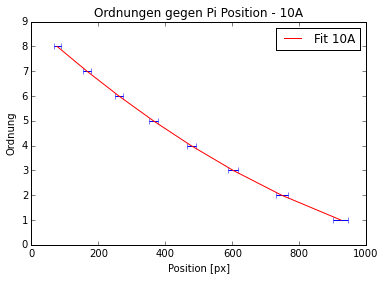

In [162]:
plt.errorbar(pi10A, Order,xerr=dpi10A,fmt="none")
popt, pcov=curve_fit(fitfunc,pi10A, Order, sigma=dpi10A)
plt.plot(pi10A,fitfunc(pi10A,*popt), "-r", label="Fit 10A")
plt.title("Ordnungen gegen Pi Position - 10A")
plt.xlabel("Position [px]")
plt.ylabel("Ordnung")
plt.legend(loc="best")
plt.ylim(0.,9.)
plt.savefig("OrdnungPi10A.pdf")


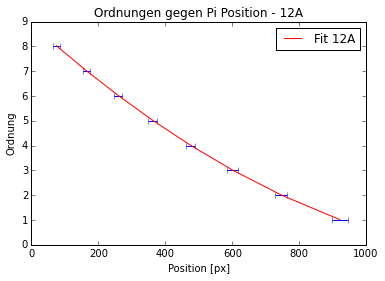

In [163]:
plt.errorbar(pi12A, Order,xerr=dpi12A,fmt="none")
popt1, pcov1=curve_fit(fitfunc,pi12A, Order, sigma=dpi12A)
plt.plot(pi12A,fitfunc(pi12A,*popt), "-r", label="Fit 12A")
plt.title("Ordnungen gegen Pi Position - 12A")
plt.xlabel("Position [px]")
plt.ylabel("Ordnung")
plt.legend(loc="best")
plt.ylim(0.,9.)
plt.savefig("OrdnungPi12A.pdf")


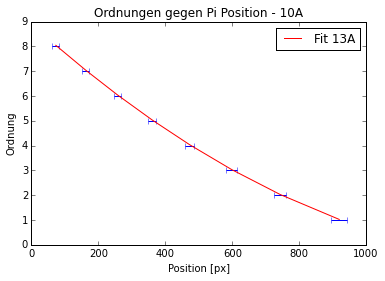

In [164]:
plt.errorbar(pi13A, Order,xerr=dpi13A,fmt="none")
popt2, pcov2=curve_fit(fitfunc,pi13A, Order, sigma=dpi13A)
plt.plot(pi13A,fitfunc(pi13A,*popt), "-r", label="Fit 13A")
plt.title("Ordnungen gegen Pi Position - 10A")
plt.xlabel("Position [px]")
plt.ylabel("Ordnung")
plt.legend(loc="best")
plt.ylim(0.,9.)
plt.savefig("OrdnungPi13A.pdf")


In [177]:
d=np.array([72.6, 162.03,257.29,360.08,472.63,598.18,743.06,919.12])+np.array([10.46,11.11,11.46,12.77,13.54,15.82,18.15,24.05])

In [178]:
print(d)

[  83.06  173.14  268.75  372.85  486.17  614.    761.21  943.17]


In [187]:
s8l=fitfunc(72.60,popt2[0],popt2[1],popt2[2])-fitfunc(50.39,popt2[0],popt2[1],popt2[2])
s8r=fitfunc(72.60,popt2[0],popt2[1],popt2[2])-fitfunc(96.01,popt2[0],popt2[1],popt2[2])
s7l=fitfunc(162.03,popt2[0],popt2[1],popt2[2])-fitfunc(138.08,popt2[0],popt2[1],popt2[2])
s7r=fitfunc(162.03,popt2[0],popt2[1],popt2[2])-fitfunc(186.44,popt2[0],popt2[1],popt2[2])
s6l=fitfunc(257.29,popt2[0],popt2[1],popt2[2])-fitfunc(231.26,popt2[0],popt2[1],popt2[2])
s6r=fitfunc(257.29,popt2[0],popt2[1],popt2[2])-fitfunc(283.84,popt2[0],popt2[1],popt2[2])
s5l=fitfunc(360.08,popt2[0],popt2[1],popt2[2])-fitfunc(332.34,popt2[0],popt2[1],popt2[2])
s5r=fitfunc(360.08,popt2[0],popt2[1],popt2[2])-fitfunc(388.65,popt2[0],popt2[1],popt2[2])
s4l=fitfunc(472.63,popt2[0],popt2[1],popt2[2])-fitfunc(441.56,popt2[0],popt2[1],popt2[2])
s4r=fitfunc(472.63,popt2[0],popt2[1],popt2[2])-fitfunc(505.02,popt2[0],popt2[1],popt2[2])
s3l=fitfunc(598.18,popt2[0],popt2[1],popt2[2])-fitfunc(564.11,popt2[0],popt2[1],popt2[2])
s3r=fitfunc(598.18,popt2[0],popt2[1],popt2[2])-fitfunc(635.01,popt2[0],popt2[1],popt2[2])
s2l=fitfunc(743.06,popt2[0],popt2[1],popt2[2])-fitfunc(702.27,popt2[0],popt2[1],popt2[2])
s2r=fitfunc(743.06,popt2[0],popt2[1],popt2[2])-fitfunc(786.47,popt2[0],popt2[1],popt2[2])
s1l=fitfunc(919.12,popt2[0],popt2[1],popt2[2])-fitfunc(868.06,popt2[0],popt2[1],popt2[2])
s1r=fitfunc(975.94,popt2[0],popt2[1],popt2[2])-fitfunc(975.94,popt2[0],popt2[1],popt2[2])
p8=fitfunc(72.60,popt2[0],popt2[1],popt2[2])-8
p7=fitfunc(162.03,popt2[0],popt2[1],popt2[2])-7
p6=fitfunc(257.29,popt2[0],popt2[1],popt2[2])-6
p5=fitfunc(360.08,popt2[0],popt2[1],popt2[2])-5
p4=fitfunc(472.63,popt2[0],popt2[1],popt2[2])-4
p3=fitfunc(598.18,popt2[0],popt2[1],popt2[2])-3
p2=fitfunc(743.06,popt2[0],popt2[1],popt2[2])-2
p1=fitfunc(919.12,popt2[0],popt2[1],popt2[2])-1
ds8l=(fitfunc(61.98,popt2[0],popt2[1],popt2[2])-fitfunc(50.39,popt2[0],popt2[1],popt2[2]))/12.51
ds8r=(fitfunc(107.15,popt2[0],popt2[1],popt2[2])-fitfunc(96.01,popt2[0],popt2[1],popt2[2]))/11.89
ds7l=(fitfunc(150.14,popt2[0],popt2[1],popt2[2])-fitfunc(138.08,popt2[0],popt2[1],popt2[2]))/12.52
ds7r=(fitfunc(198.72,popt2[0],popt2[1],popt2[2])-fitfunc(186.44,popt2[0],popt2[1],popt2[2]))/12.63
ds6l=(fitfunc(244.87,popt2[0],popt2[1],popt2[2])-fitfunc(231.26,popt2[0],popt2[1],popt2[2]))/14.09
ds6r=(fitfunc(295.53,popt2[0],popt2[1],popt2[2])-fitfunc(283.84,popt2[0],popt2[1],popt2[2]))/12.23
ds5l=(fitfunc(346.62,popt2[0],popt2[1],popt2[2])-fitfunc(332.34,popt2[0],popt2[1],popt2[2]))/14.67
ds5r=(fitfunc(402.36,popt2[0],popt2[1],popt2[2])-fitfunc(388.65,popt2[0],popt2[1],popt2[2]))/13.64
ds4l=(fitfunc(456.96,popt2[0],popt2[1],popt2[2])-fitfunc(441.56,popt2[0],popt2[1],popt2[2]))/16.08
ds4r=(fitfunc(519.0,popt2[0],popt2[1],popt2[2])-fitfunc(505.02,popt2[0],popt2[1],popt2[2]))/14.25
ds3l=(fitfunc(582.22,popt2[0],popt2[1],popt2[2])-fitfunc(564.11,popt2[0],popt2[1],popt2[2]))/18.04
ds3r=(fitfunc(605.54,popt2[0],popt2[1],popt2[2])-fitfunc(635.01,popt2[0],popt2[1],popt2[2]))/16.22
ds2l=(fitfunc(720.88,popt2[0],popt2[1],popt2[2])-fitfunc(702.27,popt2[0],popt2[1],popt2[2]))/19.39
ds2r=(fitfunc(803.66,popt2[0],popt2[1],popt2[2])-fitfunc(786.47,popt2[0],popt2[1],popt2[2]))/18.7
ds1l=(fitfunc(894.45,popt2[0],popt2[1],popt2[2])-fitfunc(868.06,popt2[0],popt2[1],popt2[2]))/27.33
ds1r=(fitfunc(999.59,popt2[0],popt2[1],popt2[2])-fitfunc(975.94,popt2[0],popt2[1],popt2[2]))/24.73
dp8=(fitfunc(83.03,popt2[0],popt2[1],popt2[2])-fitfunc(72.60,popt2[0],popt2[1],popt2[2]))/10.48
dp7=(fitfunc(173.14,popt2[0],popt2[1],popt2[2])-fitfunc(162.03,popt2[0],popt2[1],popt2[2]))/10.94
dp6=(fitfunc(268.75,popt2[0],popt2[1],popt2[2])-fitfunc(257.29,popt2[0],popt2[1],popt2[2]))/11.48
dp5=(fitfunc(372.85,popt2[0],popt2[1],popt2[2])-fitfunc(360.08,popt2[0],popt2[1],popt2[2]))/12.59
dp4=(fitfunc(486.17,popt2[0],popt2[1],popt2[2])-fitfunc(472.63,popt2[0],popt2[1],popt2[2]))/13.46
dp3=(fitfunc(614.0,popt2[0],popt2[1],popt2[2])-fitfunc(598.18,popt2[0],popt2[1],popt2[2]))/15.41
dp2=(fitfunc(761.21,popt2[0],popt2[1],popt2[2])-fitfunc(743.06,popt2[0],popt2[1],popt2[2]))/18.23
dp1=(fitfunc(943.17,popt2[0],popt2[1],popt2[2])-fitfunc(919.12,popt2[0],popt2[1],popt2[2]))/22.97

In [188]:
sl=np.array([s8l,s7l,s6l,s5l,s4l,s3l,s2l,s1l])
dsl=np.array([ds8l,ds7l,ds6l,ds5l,ds4l,ds3l,ds2l,ds1l])
sr=np.array([s8r,s7r,s6r,s5r,s4r,s3r,s2r,s1r])
dsr=np.array([ds8r,ds7r,ds6r,ds5r,ds4r,ds3r,ds2r,ds1r])
p=np.array([p8,p7,p6,p5,p4,p3,p2,p1])
dp=np.array([dp8,dp7,dp6,dp5,dp4,dp3,dp2,dp1])

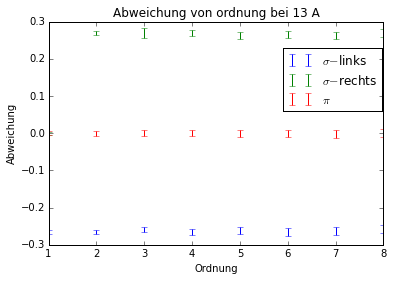

In [206]:
plt.errorbar(Order,sl, yerr=dsl, fmt="none",label="$\sigma-$links")
plt.errorbar(Order,sr,yerr=dsr, fmt="none", label="$\sigma-$rechts")
plt.errorbar(Order,p,yerr=dp, fmt="none", label="$\pi$")
plt.title("Abweichung von Ordnung bei 13 A")
plt.xlabel("Ordnung")
plt.ylabel("Abweichung")
plt.legend(loc=(0.7007,0.6))
plt.savefig("AbweichungOrdnung.pdf")

In [183]:
dsl

array([-0.13534501, -0.13261413, -0.13974628, -0.13540013, -0.1329151 ,
       -0.13891114, -0.12278016, -0.13939926])

In [190]:
plt.legend?